
1. LDA
2. keras 实现FastText
3. FastText调包

In [1]:
import os
import re
import jieba
import pandas as pd
import numpy as np
import tensorflow as tf
tf.__version__

'2.0.0'

# 0. 加载数据

In [14]:
root = 'C:/Users/K/资深NLP/week9/9-2随堂课件/lecture_1_2/data/百度题库/高中_历史/origin/' 

In [15]:
ancient_his_df=pd.read_csv( open(os.path.join(root,'古代史.csv'),encoding='utf-8'))
contemporary_his_df=pd.read_csv( open(os.path.join(root,'现代史.csv'),encoding='utf-8'))  
modern_his_df=pd.read_csv( open(os.path.join(root,'近代史.csv'),encoding='utf-8')) 

# 贴标签

In [16]:
ancient_his_df.head()

,web-scraper-order,web-scraper-start-url,item
0,1566523436-2497,https://study.baidu.com/tiku,[题目]\n据《左传》记载，春秋后期鲁国大夫季孙氏的家臣阳虎独掌权柄后，标榜要替鲁国国君整肃...
1,1566523436-2506,https://study.baidu.com/tiku,[题目]\n秦始皇统一六国后创制了一套御玺。如任命国家官员，则封印“皇帝之玺”；若任命四夷的...
2,1566523436-2153,https://study.baidu.com/tiku,[题目]\n北宋加强中央集权的主要措施有（ ）\n①把主要将领的兵权收归中央②派文官担任...
3,1566523436-2328,https://study.baidu.com/tiku,[题目]\n商朝人崇信各种鬼神，把占卜、祭祀作为与神灵沟通的手段，负责通神事务的是商王和巫师...
4,1566523436-1914,https://study.baidu.com/tiku,[题目]\n公元963年，北宋政府在江淮地区设置了包括盐业管理，以及控制对茶叶销售的专卖等为...


In [17]:
ancient_his_df['label']='__label__古代史'
contemporary_his_df['label']='__label__现代史'
modern_his_df['label']='__label__近代史'

In [18]:
ancient_his_df.head()

,web-scraper-order,web-scraper-start-url,item,label
0,1566523436-2497,https://study.baidu.com/tiku,[题目]\n据《左传》记载，春秋后期鲁国大夫季孙氏的家臣阳虎独掌权柄后，标榜要替鲁国国君整肃...,__label__古代史
1,1566523436-2506,https://study.baidu.com/tiku,[题目]\n秦始皇统一六国后创制了一套御玺。如任命国家官员，则封印“皇帝之玺”；若任命四夷的...,__label__古代史
2,1566523436-2153,https://study.baidu.com/tiku,[题目]\n北宋加强中央集权的主要措施有（ ）\n①把主要将领的兵权收归中央②派文官担任...,__label__古代史
3,1566523436-2328,https://study.baidu.com/tiku,[题目]\n商朝人崇信各种鬼神，把占卜、祭祀作为与神灵沟通的手段，负责通神事务的是商王和巫师...,__label__古代史
4,1566523436-1914,https://study.baidu.com/tiku,[题目]\n公元963年，北宋政府在江淮地区设置了包括盐业管理，以及控制对茶叶销售的专卖等为...,__label__古代史


# 加载停用词

In [20]:
def load_stop_words(stop_word_path):
    '''
    加载停用词
    :param stop_word_path:停用词路径
    :return: 停用词表 list
    '''
    # 打开文件
    file = open(stop_word_path, 'r', encoding='utf-8')
    # 读取所有行
    stop_words = file.readlines()
    # 去除每一个停用词前后 空格 换行符
    stop_words = [stop_word.strip() for stop_word in stop_words]
    return stop_words

In [19]:
stopwords_path='C:/Users/K/资深NLP/week10/10-2随堂课件/lecture02/data/stopwords/哈工大停用词表.txt'

# 过滤字符

In [21]:
def clean_sentence(line):
    line = re.sub(
            "[a-zA-Z0-9]|[\s+\-\|\!\/\[\]\{\}_,.$%^*(+\"\')]+|[:：+——()?【】《》“”！，。？、~@#￥%……&*（）]+|题目", '',line)
    words = jieba.cut(line, cut_all=False)
    return words

In [22]:
stop_words=load_stop_words(stopwords_path)

def sentence_proc(sentence):
    '''
    预处理模块
    :param sentence:待处理字符串
    :return: 处理后的字符串
    '''
    # 清除无用词
    words = clean_sentence(sentence)
    # 过滤停用词
    words = [word for word in words if word not in stop_words]
    # 拼接成一个字符串,按空格分隔
    return ' '.join(words)

In [23]:
ancient_his_df['item']

0      [题目]\n据《左传》记载，春秋后期鲁国大夫季孙氏的家臣阳虎独掌权柄后，标榜要替鲁国国君整肃...
1      [题目]\n秦始皇统一六国后创制了一套御玺。如任命国家官员，则封印“皇帝之玺”；若任命四夷的...
2      [题目]\n北宋加强中央集权的主要措施有（   ）\n①把主要将领的兵权收归中央②派文官担任...
3      [题目]\n商朝人崇信各种鬼神，把占卜、祭祀作为与神灵沟通的手段，负责通神事务的是商王和巫师...
4      [题目]\n公元963年，北宋政府在江淮地区设置了包括盐业管理，以及控制对茶叶销售的专卖等为...
5      [题目]\n《左传》有云：“昔周公、大公股肱周室，夹辅成王。成王劳之，而赐之盟，曰：世世子孙...
6      [题目]\n某一同学在研究性学习过程中搜集了如下一组图片，据此判断他的研究主题是（     ...
7      [题目]\n古人对秦朝短期而亡的主要原因的分析，最准确的是（  ）A. “废先王之道，燔百家...
8      [题目]\n《汉书·武帝纪》记载：“春正月，诏曰：‘梁王、城阳王亲慈同生，愿以邑分弟，其许之...
9      [题目]\n元代行省的设置，无视历来与划界密切相关的几条最重要的山川边界——秦岭、淮河、南岭...
10     [题目]\n西周的分封制规定，被封的诸侯国必须服从周天子的命令，诸侯的义务有（  ）\n① ...
11     [题目]\n公元前127年，汉皇帝规定诸侯王除由嫡长子继承王位外，其他诸子都在王国范围内分到...
12     [题目]\n梁启超认为,在汉朝,中国发生了一场有意义的革命,打破了三代以来贵族政治的局面。这...
13     [题目]\n《左传》记载“昔武王克商，光有天下，其兄弟之国者十有五人，姬姓之国者四十人，皆举...
14     [题目]\n战国时期，官员禄秩的秩名来自俸禄额度。秦国和燕国，俸禄成为官阶，出现了三百石以上...
15     [题目]\n马克思在《世界文明史》中说：“唐宋时期的国家体制可称之为中央集权的君主制……中央...
16     [题目]\n有网友发表帖子讨论科举制时说：“自秦以来，科举兴于世，始以八股为试，学子彻夜秉读...
17     [题目]\n下图中两位思想家\nA. 所持道德观

In [24]:
%%time
ancient_his_df['item']=ancient_his_df['item'].apply(sentence_proc)
contemporary_his_df['item']=contemporary_his_df['item'].apply(sentence_proc)
modern_his_df['item']=modern_his_df['item'].apply(sentence_proc)

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\K\AppData\Local\Temp\jieba.cache
Loading model cost 1.711 seconds.
Prefix dict has been built succesfully.


Wall time: 29.6 s


# 数据集合并

In [26]:
dataset_df=pd.concat([ancient_his_df,contemporary_his_df,modern_his_df])
dataset_df.head()

,web-scraper-order,web-scraper-start-url,item,label
0,1566523436-2497,https://study.baidu.com/tiku,左传 记载 春秋 后期 鲁国 大夫 季孙氏 家臣 阳虎 独掌 权柄 后 标榜 鲁国 国君 整...,__label__古代史
1,1566523436-2506,https://study.baidu.com/tiku,秦始皇 统一 六国后 创制 一套 御玺 任命 国家 官员 封印 皇帝 之玺 任命 四夷 官员...,__label__古代史
2,1566523436-2153,https://study.baidu.com/tiku,北宋 加强 中央集权 主要 措施 主要 将领 兵权 收归 中央 派 文官 担任 地方 长官 ...,__label__古代史
3,1566523436-2328,https://study.baidu.com/tiku,商朝人 崇信 鬼神 占卜 祭祀 神灵 沟通 手段 负责 通神 事务 商王 巫师 往往 出身 ...,__label__古代史
4,1566523436-1914,https://study.baidu.com/tiku,公元 年 北宋 政府 江淮地区 设置 包括 盐业 管理 控制 茶叶 销售 专卖 主要职责 转...,__label__古代史


# 1. LDA主题模型

> LDA是一种文档主题生成模型，也称为一个三层贝叶斯概率模型，包含词、主题和文档三层结构。
生成模型：我们认为一篇文章的每个词都是通过“以一定概率选择了某个主题，并从这个主题中以一定概率选择某个词语”这样一个过程得到。文档到主题服从多项式分布，主题到词服从多项式分布。


> LDA是一种非监督机器学习技术，可以用来识别大规模文档集（document collection）或语料库（corpus）中潜藏的主题信息。
* 采用了词袋的方法，把每一篇文档看做为一个词频向量；
* 每一篇文档代表了一些主题所构成的一个概率分布，而每一个主题又代表了很多单词所构成的一个概率分布。

In [27]:
dataset_df

,web-scraper-order,web-scraper-start-url,item,label
0,1566523436-2497,https://study.baidu.com/tiku,左传 记载 春秋 后期 鲁国 大夫 季孙氏 家臣 阳虎 独掌 权柄 后 标榜 鲁国 国君 整...,__label__古代史
1,1566523436-2506,https://study.baidu.com/tiku,秦始皇 统一 六国后 创制 一套 御玺 任命 国家 官员 封印 皇帝 之玺 任命 四夷 官员...,__label__古代史
2,1566523436-2153,https://study.baidu.com/tiku,北宋 加强 中央集权 主要 措施 主要 将领 兵权 收归 中央 派 文官 担任 地方 长官 ...,__label__古代史
3,1566523436-2328,https://study.baidu.com/tiku,商朝人 崇信 鬼神 占卜 祭祀 神灵 沟通 手段 负责 通神 事务 商王 巫师 往往 出身 ...,__label__古代史
4,1566523436-1914,https://study.baidu.com/tiku,公元 年 北宋 政府 江淮地区 设置 包括 盐业 管理 控制 茶叶 销售 专卖 主要职责 转...,__label__古代史
5,1566523436-2410,https://study.baidu.com/tiku,左传 有云昔 周公 大公 股肱 周室 夹辅成 王成 王劳 赐 之盟 曰 世世 子孙 无相害 ...,__label__古代史
6,1566523436-2243,https://study.baidu.com/tiku,某一 同学 研究性 学习 过程 中 搜集 如下 一组 图片 据此 判断 研究 主题 中国 古...,__label__古代史
7,1566523436-2545,https://study.baidu.com/tiku,古人 秦朝 短期 而亡 主要 原因 分析 最 准确 废先 王之道 燔 百家 之言以 愚 黔首...,__label__古代史
8,1566523436-2129,https://study.baidu.com/tiku,汉书 武帝纪 记载 春 正月 诏 曰 梁王 城阳 王亲 慈同 生愿 邑 分弟 其许 诸侯王 ...,__label__古代史
9,1566523436-1969,https://study.baidu.com/tiku,元代 行省 设置 无视 历来 划界 密切相关 几条 最 重要 山川 边界 秦岭 淮河 南岭 ...,__label__古代史


# 转换下格式

In [28]:
common_texts=dataset_df['item'].apply(lambda x:x.split()).tolist()

In [30]:
common_texts

[['左传',
  '记载',
  '春秋',
  '后期',
  '鲁国',
  '大夫',
  '季孙氏',
  '家臣',
  '阳虎',
  '独掌',
  '权柄',
  '后',
  '标榜',
  '鲁国',
  '国君',
  '整肃',
  '跋扈',
  '大夫',
  '此举',
  '得不到',
  '知礼',
  '之士',
  '赞成',
  '反而',
  '受到',
  '批评',
  '此举',
  '挑战',
  '宗法制度',
  '损害',
  '大夫',
  '利益',
  '冲击',
  '天子',
  '权威',
  '不',
  '符合',
  '周礼',
  '规定',
  '题型',
  '单选题',
  '难度',
  '使用',
  '次数',
  '纠错',
  '复制',
  '收藏',
  '空间',
  '加入',
  '选题',
  '篮',
  '查看',
  '答案',
  '解析',
  '答案',
  '解析',
  '阳虎',
  '身份',
  '鲁国',
  '大夫',
  '季孙氏',
  '家臣',
  '周礼',
  '规定',
  '效忠',
  '季孙氏',
  '标榜',
  '鲁国',
  '国君',
  '整肃',
  '大夫',
  '僭',
  '越',
  '受到',
  '批评',
  '违背',
  '周礼',
  '选择项',
  '宗法制度',
  '血缘',
  '核心',
  '故项',
  '与此无关',
  '排除',
  '项',
  '题意',
  '无关',
  '排除',
  '材料',
  '事件',
  '涉及',
  '鲁国',
  '国内',
  '周天子',
  '权威',
  '无关',
  '排除',
  '项',
  '知识点',
  '知识点',
  '重',
  '农抑商',
  '政策',
  '郡县制',
  '夏商',
  '两代',
  '政治',
  '制度',
  '中央',
  '官制',
  '三公九卿',
  '制',
  '皇帝',
  '制度'],
 ['秦始皇',
  '统一',
  '六国后',
  '创制',
  '一套',
  '御玺',
  '任命',
  '国家',
  '官员',
  '

In [31]:
import numpy as np
from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaModel

In [32]:
# 把文章转成list
dictionary = Dictionary(common_texts)
print(type(common_texts))
print(common_texts[0])

<class 'list'>
['左传', '记载', '春秋', '后期', '鲁国', '大夫', '季孙氏', '家臣', '阳虎', '独掌', '权柄', '后', '标榜', '鲁国', '国君', '整肃', '跋扈', '大夫', '此举', '得不到', '知礼', '之士', '赞成', '反而', '受到', '批评', '此举', '挑战', '宗法制度', '损害', '大夫', '利益', '冲击', '天子', '权威', '不', '符合', '周礼', '规定', '题型', '单选题', '难度', '使用', '次数', '纠错', '复制', '收藏', '空间', '加入', '选题', '篮', '查看', '答案', '解析', '答案', '解析', '阳虎', '身份', '鲁国', '大夫', '季孙氏', '家臣', '周礼', '规定', '效忠', '季孙氏', '标榜', '鲁国', '国君', '整肃', '大夫', '僭', '越', '受到', '批评', '违背', '周礼', '选择项', '宗法制度', '血缘', '核心', '故项', '与此无关', '排除', '项', '题意', '无关', '排除', '材料', '事件', '涉及', '鲁国', '国内', '周天子', '权威', '无关', '排除', '项', '知识点', '知识点', '重', '农抑商', '政策', '郡县制', '夏商', '两代', '政治', '制度', '中央', '官制', '三公九卿', '制', '皇帝', '制度']


In [33]:
# 把文本转成词袋形式  id : freq
corpus = [dictionary.doc2bow(text) for text in common_texts]

In [37]:
corpus[3]

[(0, 1),
 (3, 1),
 (4, 1),
 (7, 1),
 (9, 1),
 (12, 1),
 (13, 2),
 (14, 1),
 (15, 1),
 (24, 1),
 (25, 1),
 (30, 1),
 (38, 1),
 (39, 1),
 (40, 1),
 (41, 4),
 (44, 1),
 (48, 3),
 (49, 1),
 (52, 1),
 (56, 1),
 (58, 2),
 (59, 1),
 (61, 3),
 (62, 1),
 (63, 1),
 (66, 2),
 (74, 1),
 (75, 1),
 (76, 1),
 (78, 1),
 (80, 1),
 (97, 2),
 (113, 1),
 (118, 1),
 (121, 1),
 (125, 1),
 (131, 1),
 (133, 3),
 (162, 1),
 (163, 2),
 (164, 1),
 (165, 2),
 (166, 2),
 (167, 1),
 (168, 2),
 (169, 1),
 (170, 1),
 (171, 1),
 (172, 4),
 (173, 4),
 (174, 1),
 (175, 4),
 (176, 3),
 (177, 1),
 (178, 2),
 (179, 1),
 (180, 2),
 (181, 1),
 (182, 2),
 (183, 1),
 (184, 2),
 (185, 1),
 (186, 1),
 (187, 1),
 (188, 2),
 (189, 1),
 (190, 1),
 (191, 2),
 (192, 2),
 (193, 3),
 (194, 3),
 (195, 1),
 (196, 2),
 (197, 4),
 (198, 2),
 (199, 1),
 (200, 2),
 (201, 1),
 (202, 2),
 (203, 2),
 (204, 1),
 (205, 1),
 (206, 1),
 (207, 2),
 (208, 1)]

In [38]:
# 调用lda模型，并指定3个主题
lda = LdaModel(corpus,id2word=dictionary, num_topics=3)

In [39]:
# 检查结果
lda.print_topic(0, topn=50)

'0.019*"答案" + 0.015*"解析" + 0.015*"知识点" + 0.011*"材料" + 0.009*"发展" + 0.009*"中国" + 0.008*"使用" + 0.008*"选题" + 0.008*"复制" + 0.008*"加入" + 0.008*"难度" + 0.008*"收藏" + 0.008*"次数" + 0.007*"纠错" + 0.007*"空间" + 0.007*"查看" + 0.007*"题型" + 0.007*"篮" + 0.007*"单选题" + 0.007*"中" + 0.006*"排除" + 0.006*"经济" + 0.006*"出现" + 0.006*"英国" + 0.006*"错误" + 0.005*"年" + 0.005*"不" + 0.005*"资本主义" + 0.005*"正确" + 0.005*"世界" + 0.004*"项" + 0.004*"故项" + 0.004*"主要" + 0.004*"新" + 0.004*"本题" + 0.004*"世界市场" + 0.004*"民族" + 0.004*"可知" + 0.004*"影响" + 0.003*"考查" + 0.003*"社会" + 0.003*"知识" + 0.003*"反映" + 0.003*"国家" + 0.003*"符合" + 0.003*"所学" + 0.003*"近代" + 0.003*"世纪" + 0.003*"工业" + 0.003*"形成"'

In [40]:
# 检查结果
lda.print_topic(2, topn=50)

'0.018*"答案" + 0.016*"知识点" + 0.015*"解析" + 0.014*"中国" + 0.013*"材料" + 0.010*"年" + 0.009*"排除" + 0.008*"空间" + 0.008*"加入" + 0.008*"题型" + 0.008*"篮" + 0.008*"发展" + 0.008*"次数" + 0.008*"单选题" + 0.008*"纠错" + 0.008*"使用" + 0.008*"查看" + 0.007*"难度" + 0.007*"收藏" + 0.007*"复制" + 0.007*"选题" + 0.006*"错误" + 0.006*"中" + 0.005*"不" + 0.005*"符合" + 0.004*"制度" + 0.004*"主要" + 0.004*"正确" + 0.004*"故项" + 0.004*"经济" + 0.004*"题意" + 0.004*"可知" + 0.004*"本题" + 0.003*"新" + 0.003*"项" + 0.003*"知识" + 0.003*"时期" + 0.003*"国家" + 0.003*"民族" + 0.003*"所学" + 0.003*"思想" + 0.003*"考查" + 0.003*"反映" + 0.003*"美国" + 0.003*"政策" + 0.003*"体现" + 0.003*"政治" + 0.003*"社会主义" + 0.003*"没有" + 0.002*"出现"'

In [43]:
dictionary.id2token

{0: '三公九卿',
 1: '不',
 2: '与此无关',
 3: '两代',
 4: '中央',
 5: '之士',
 6: '事件',
 7: '使用',
 8: '僭',
 9: '农抑商',
 10: '冲击',
 11: '利益',
 12: '制',
 13: '制度',
 14: '加入',
 15: '单选题',
 16: '反而',
 17: '受到',
 18: '后',
 19: '后期',
 20: '周天子',
 21: '周礼',
 22: '国内',
 23: '国君',
 24: '复制',
 25: '夏商',
 26: '大夫',
 27: '天子',
 28: '季孙氏',
 29: '宗法制度',
 30: '官制',
 31: '家臣',
 32: '左传',
 33: '得不到',
 34: '批评',
 35: '挑战',
 36: '损害',
 37: '排除',
 38: '收藏',
 39: '政治',
 40: '政策',
 41: '故项',
 42: '效忠',
 43: '整肃',
 44: '无关',
 45: '春秋',
 46: '权威',
 47: '权柄',
 48: '材料',
 49: '查看',
 50: '标榜',
 51: '核心',
 52: '次数',
 53: '此举',
 54: '涉及',
 55: '独掌',
 56: '皇帝',
 57: '知礼',
 58: '知识点',
 59: '空间',
 60: '符合',
 61: '答案',
 62: '篮',
 63: '纠错',
 64: '血缘',
 65: '规定',
 66: '解析',
 67: '记载',
 68: '赞成',
 69: '越',
 70: '跋扈',
 71: '身份',
 72: '违背',
 73: '选择项',
 74: '选题',
 75: '郡县制',
 76: '重',
 77: '阳虎',
 78: '难度',
 79: '项',
 80: '题型',
 81: '题意',
 82: '鲁国',
 83: '一套',
 84: '不能',
 85: '两种',
 86: '中央集权',
 87: '之玺',
 88: '事宜',
 89: '事故',
 90: '任命',
 

In [415]:
len(dictionary.token2id)

31684

In [44]:
bow_sample=[(0, 1)]

In [45]:
lda.get_document_topics(bow_sample)

[(0, 0.16845375), (1, 0.6596317), (2, 0.17191458)]

In [46]:
bow_sample=[(0, 2)]
lda.get_document_topics(bow_sample)

[(0, 0.11223386), (1, 0.773363), (2, 0.11440318)]

# 2. FastText分类

In [47]:
max_features = 10000
class_num= 3
ngram_range= 2

## 数据集

In [476]:
dataset_df.head()

,web-scraper-order,web-scraper-start-url,item,label
0,1566523436-2497,https://study.baidu.com/tiku,左传 记载 春秋 后期 鲁国 大夫 季孙氏 家臣 阳虎 独掌 权柄 后 标榜 鲁国 国君 整...,__label__古代史
1,1566523436-2506,https://study.baidu.com/tiku,秦始皇 统一 六国后 创制 一套 御玺 任命 国家 官员 封印 皇帝 之玺 任命 四夷 官员...,__label__古代史
2,1566523436-2153,https://study.baidu.com/tiku,北宋 加强 中央集权 主要 措施 主要 将领 兵权 收归 中央 派 文官 担任 地方 长官 ...,__label__古代史
3,1566523436-2328,https://study.baidu.com/tiku,商朝人 崇信 鬼神 占卜 祭祀 神灵 沟通 手段 负责 通神 事务 商王 巫师 往往 出身 ...,__label__古代史
4,1566523436-1914,https://study.baidu.com/tiku,公元 年 北宋 政府 江淮地区 设置 包括 盐业 管理 控制 茶叶 销售 专卖 主要职责 转...,__label__古代史


# 提取特征

In [48]:
from tensorflow.keras import preprocessing
from tensorflow.keras.preprocessing import sequence
from sklearn.preprocessing import OneHotEncoder,LabelBinarizer
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

# 输入数据编码

In [49]:
from tensorflow.keras.preprocessing.text import Tokenizer

# 转换下格式

In [50]:
corpus = dataset_df['item']

In [51]:
text_preprocesser = preprocessing.text.Tokenizer(num_words=max_features,oov_token="<UNK>")

In [52]:
text_preprocesser.fit_on_texts(corpus)

In [53]:
len(text_preprocesser.word_index)

31683

In [54]:
text_preprocesser.word_counts

OrderedDict([('左传', 12),
             ('记载', 193),
             ('春秋', 60),
             ('后期', 79),
             ('鲁国', 25),
             ('大夫', 44),
             ('季孙氏', 3),
             ('家臣', 6),
             ('阳虎', 2),
             ('独掌', 1),
             ('权柄', 2),
             ('后', 1231),
             ('标榜', 4),
             ('国君', 26),
             ('整肃', 2),
             ('跋扈', 5),
             ('此举', 17),
             ('得不到', 8),
             ('知礼', 1),
             ('之士', 16),
             ('赞成', 22),
             ('反而', 23),
             ('受到', 297),
             ('批评', 25),
             ('挑战', 97),
             ('宗法制度', 32),
             ('损害', 19),
             ('利益', 272),
             ('冲击', 163),
             ('天子', 131),
             ('权威', 99),
             ('不', 3583),
             ('符合', 2533),
             ('周礼', 26),
             ('规定', 374),
             ('题型', 4976),
             ('单选题', 4850),
             ('难度', 4994),
             ('使用', 5124),
            

## 转换id

In [55]:
x = text_preprocesser.texts_to_sequences(corpus)
word_dict = text_preprocesser.word_index

In [56]:
word_dict

{'<UNK>': 1,
 '答案': 2,
 '知识点': 3,
 '解析': 4,
 '材料': 5,
 '中国': 6,
 '使用': 7,
 '发展': 8,
 '加入': 9,
 '空间': 10,
 '排除': 11,
 '难度': 12,
 '选题': 13,
 '题型': 14,
 '纠错': 15,
 '次数': 16,
 '收藏': 17,
 '复制': 18,
 '篮': 19,
 '查看': 20,
 '制度': 21,
 '单选题': 22,
 '错误': 23,
 '中': 24,
 '经济': 25,
 '年': 26,
 '不': 27,
 '正确': 28,
 '主要': 29,
 '项': 30,
 '故项': 31,
 '本题': 32,
 '政治': 33,
 '符合': 34,
 '可知': 35,
 '知识': 36,
 '出现': 37,
 '所学': 38,
 '考查': 39,
 '政策': 40,
 '思想': 41,
 '国家': 42,
 '题意': 43,
 '新': 44,
 '资本主义': 45,
 '反映': 46,
 '时期': 47,
 '体现': 48,
 '没有': 49,
 '世界': 50,
 '民族': 51,
 '英国': 52,
 '社会': 53,
 '信息': 54,
 '美国': 55,
 '结合': 56,
 '上': 57,
 '皇帝': 58,
 '说明': 59,
 '能力': 60,
 '影响': 61,
 '形成': 62,
 '选项': 63,
 '世纪': 64,
 '中央': 65,
 '制': 66,
 '都': 67,
 '后': 68,
 '不是': 69,
 '人': 70,
 '变化': 71,
 '历史': 72,
 '工业': 73,
 '关系': 74,
 '郡县制': 75,
 '建立': 76,
 '农抑商': 77,
 '近代': 78,
 '重': 79,
 '学生': 80,
 '属于': 81,
 '革命': 82,
 '官制': 83,
 '权力': 84,
 '三公九卿': 85,
 '政府': 86,
 '当时': 87,
 '民主': 88,
 '主张': 89,
 '加强': 90,
 '夏商': 91,
 '两代': 92

# 保存字典

In [485]:
# save word2id
with open('data/vocab.txt', 'w', encoding='UTF8') as f:
    for k,v in word_dict.items():
        f.write(f'{k}\t{str(v)}\n')

In [486]:
len(word_dict)

31683

# 标签编码

In [57]:
from sklearn.preprocessing import OneHotEncoder,LabelBinarizer

In [58]:
lb = LabelBinarizer()
lb.fit(dataset_df['label'])
print(lb.classes_)
y = lb.transform(dataset_df['label'])

['__label__古代史' '__label__现代史' '__label__近代史']


In [59]:
dataset_df['label'].head(5)

0    __label__古代史
1    __label__古代史
2    __label__古代史
3    __label__古代史
4    __label__古代史
Name: label, dtype: object

In [60]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       ...,
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1]])

# 划分数据集

In [63]:
x[0]

[4382,
 492,
 1346,
 1056,
 2594,
 1730,
 1,
 7070,
 1,
 1,
 1,
 68,
 9260,
 2594,
 2511,
 1,
 8176,
 1730,
 3422,
 5852,
 1,
 3584,
 2858,
 2762,
 299,
 2595,
 3422,
 893,
 2158,
 3195,
 1730,
 334,
 573,
 683,
 866,
 27,
 34,
 2512,
 227,
 14,
 22,
 12,
 7,
 16,
 15,
 18,
 17,
 10,
 9,
 13,
 19,
 20,
 2,
 4,
 2,
 4,
 1,
 1617,
 2594,
 1730,
 1,
 7070,
 2512,
 227,
 9261,
 1,
 9260,
 2594,
 2511,
 1,
 1730,
 3297,
 2596,
 299,
 2595,
 1116,
 2512,
 1646,
 2158,
 1206,
 724,
 31,
 4645,
 11,
 30,
 43,
 165,
 11,
 5,
 493,
 163,
 2594,
 470,
 1419,
 866,
 165,
 11,
 30,
 3,
 3,
 79,
 77,
 40,
 75,
 91,
 92,
 33,
 21,
 65,
 83,
 85,
 66,
 58,
 21]

In [64]:
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# 特征提取

In [66]:
def create_ngram_set(input_list, ngram_value=2):
    """
    Extract a set of n-grams from a list of integers.
    # >>> create_ngram_set([1, 4, 9, 4, 1, 4], ngram_value=2)
    {(4, 9), (4, 1), (1, 4), (9, 4)}
    # >>> create_ngram_set([1, 4, 9, 4, 1, 4], ngram_value=3)
    [(1, 4, 9), (4, 9, 4), (9, 4, 1), (4, 1, 4)]
    """
    return set(zip(*[input_list[i:] for i in range(ngram_value)]))


def add_ngram(sequences, token_indice, ngram_range=2):
    """
    Augment the input list of list (sequences) by appending n-grams values.
    Example: adding bi-gram
    # >>> sequences = [[1, 3, 4, 5], [1, 3, 7, 9, 2]]
    # >>> token_indice = {(1, 3): 1337, (9, 2): 42, (4, 5): 2017}
    # >>> add_ngram(sequences, token_indice, ngram_range=2)
    [[1, 3, 4, 5, 1337, 2017], [1, 3, 7, 9, 2, 1337, 42]]
    Example: adding tri-gram
    # >>> sequences = [[1, 3, 4, 5], [1, 3, 7, 9, 2]]
    # >>> token_indice = {(1, 3): 1337, (9, 2): 42, (4, 5): 2017, (7, 9, 2): 2018}
    # >>> add_ngram(sequences, token_indice, ngram_range=3)
    [[1, 3, 4, 5, 1337, 2017], [1, 3, 7, 9, 2, 1337, 42, 2018]]
    """
    new_sequences = []
    for input_list in sequences:
        new_list = input_list[:]
        for ngram_value in range(2, ngram_range + 1):
            for i in range(len(new_list) - ngram_value + 1):
                ngram = tuple(new_list[i:i + ngram_value])
                if ngram in token_indice:
                    new_list.append(token_indice[ngram])
        new_sequences.append(new_list)
    return np.array(new_sequences)

In [67]:
ngram_range

2

In [68]:
if ngram_range > 1:
    print('Adding {}-gram features'.format(ngram_range))
    # Create set of unique n-gram from the training set.
    ngram_set = set()
    for input_list in X_train:
        for i in range(2, ngram_range + 1):
            set_of_ngram = create_ngram_set(input_list, ngram_value=i)
            ngram_set.update(set_of_ngram)

    # Dictionary mapping n-gram token to a unique integer.
    # Integer values are greater than max_features in order
    # to avoid collision with existing features.
    start_index = max_features + 1
    token_indice = {v: k + start_index for k, v in enumerate(ngram_set)}
    indice_token = {token_indice[k]: k for k in token_indice}

    # max_features is the highest integer that could be found in the dataset.
    max_features = np.max(list(indice_token.keys())) + 1

    # Augmenting x_train and x_test with n-grams features
    X_train = add_ngram(X_train, token_indice, ngram_range)
    X_test = add_ngram(X_test, token_indice, ngram_range)

Adding 2-gram features


In [69]:
token_indice

{(469, 1716): 10001,
 (209, 5386): 10002,
 (185, 101): 10003,
 (5409, 2768): 10004,
 (208, 8701): 10005,
 (171, 86): 10006,
 (851, 8549): 10007,
 (835, 255): 10008,
 (1, 5203): 10009,
 (2411, 1): 10010,
 (1561, 1): 10011,
 (6, 5528): 10012,
 (90, 42): 10013,
 (1282, 546): 10014,
 (95, 2051): 10015,
 (4233, 248): 10016,
 (6103, 1): 10017,
 (5, 2327): 10018,
 (369, 81): 10019,
 (44, 1347): 10020,
 (26, 2566): 10021,
 (23, 1970): 10022,
 (848, 1702): 10023,
 (239, 2139): 10024,
 (1499, 2785): 10025,
 (69, 912): 10026,
 (1535, 2003): 10027,
 (87, 459): 10028,
 (4839, 877): 10029,
 (2145, 46): 10030,
 (234, 6713): 10031,
 (25, 1050): 10032,
 (2854, 4276): 10033,
 (4110, 1): 10034,
 (4996, 2806): 10035,
 (1326, 4361): 10036,
 (693, 2023): 10037,
 (269, 479): 10038,
 (1288, 665): 10039,
 (81, 132): 10040,
 (6165, 59): 10041,
 (1774, 307): 10042,
 (298, 6736): 10043,
 (2483, 731): 10044,
 (711, 263): 10045,
 (1232, 54): 10046,
 (2901, 3337): 10047,
 (533, 1983): 10048,
 (24, 3533): 10049,
 (19

In [70]:
max_features

160356

In [71]:
len(indice_token)

150355

# Padding

In [72]:
print('Average train sequence length: {}'.format(np.mean(list(map(len, X_train)), dtype=int)))
print('Average test sequence length: {}'.format(np.mean(list(map(len, X_test)), dtype=int)))
maxlen=int(np.ceil(max(np.mean(list(map(len, X_train))),np.mean(list(map(len, X_test))))))
print('Average lenght:{}'.format(maxlen))

Average train sequence length: 256
Average test sequence length: 226
Average lenght:257


In [73]:
print('Pad sequences (samples x time)...')
X_train = sequence.pad_sequences(X_train, maxlen=maxlen,padding='post', truncating='post')
X_test = sequence.pad_sequences(X_test, maxlen=maxlen,padding='post', truncating='post')
print('x_train shape:', X_train.shape)
print('x_test shape:', X_test.shape)

Pad sequences (samples x time)...
x_train shape: (3976, 257)
x_test shape: (994, 257)


In [74]:
X_train.shape

(3976, 257)

# FastText

> 1. 第一层是嵌入（Embedding）层。该层采用整数编码的词汇表，并查找每个词索引的嵌入向量（embedding vector）。这些向量是通过模型训练学习到的。向量向输出数组增加了一个维度。得到的维度为：(batch, sequence, embedding)。
2. 接下来，GlobalAveragePooling1D 将通过对序列维度求平均值来为每个样本返回一个定长输出向量。这允许模型以尽可能最简单的方式处理变长输入。
3. 最后一层与单个输出结点密集连接。使用 Sigmoid 激活函数，其函数值为介于 0 与 1 之间的浮点数，表示概率或置信度。

In [75]:
class FastText(object):
    def __init__(self, maxlen, max_features, embedding_dims,
                 class_num=1,
                 last_activation='sigmoid'):
        self.maxlen = maxlen
        self.max_features = max_features
        self.embedding_dims = embedding_dims
        self.class_num = class_num
        self.last_activation = last_activation

    def get_model(self):
        input = Input((self.maxlen,))

        embedding = Embedding(self.max_features, self.embedding_dims, input_length=self.maxlen)(input)
        x = GlobalAveragePooling1D()(embedding)

        output = Dense(self.class_num, activation=self.last_activation)(x)
        model = Model(inputs=input, outputs=output)
        return model

# 评估

In [76]:
batch_size = 128
embedding_dims = 300
epochs = 20

In [77]:
print('Build model...')
model = FastText(maxlen, max_features, embedding_dims,class_num).get_model()
model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])
model.summary()

Build model...
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 257)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 257, 300)          48106800  
_________________________________________________________________
global_average_pooling1d (Gl (None, 300)               0         
_________________________________________________________________
dense (Dense)                (None, 3)                 903       
Total params: 48,107,703
Trainable params: 48,107,703
Non-trainable params: 0
_________________________________________________________________


In [78]:
epochs

20

In [79]:
print('Train...')
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, mode='max')

history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          workers=32,
          use_multiprocessing=True,
          callbacks=[early_stopping],
          validation_data=(X_test, y_test))

Train...
Train on 3976 samples, validate on 994 samples
Epoch 1/20
3976/3976 [==============================] - 44s 11ms/sample - loss: 0.6682 - accuracy: 0.6671 - val_loss: 0.6316 - val_accuracy: 0.6824
Epoch 2/20
3976/3976 [==============================] - 41s 10ms/sample - loss: 0.6058 - accuracy: 0.7407 - val_loss: 0.5803 - val_accuracy: 0.7381
Epoch 3/20
3976/3976 [==============================] - 41s 10ms/sample - loss: 0.5564 - accuracy: 0.7380 - val_loss: 0.5452 - val_accuracy: 0.7354
Epoch 4/20
3976/3976 [==============================] - 41s 10ms/sample - loss: 0.5121 - accuracy: 0.7624 - val_loss: 0.5024 - val_accuracy: 0.7465
Epoch 5/20
3976/3976 [==============================] - 41s 10ms/sample - loss: 0.4616 - accuracy: 0.8042 - val_loss: 0.4573 - val_accuracy: 0.7830
Epoch 6/20
3976/3976 [==============================] - 40s 10ms/sample - loss: 0.4103 - accuracy: 0.8426 - val_loss: 0.4200 - val_accuracy: 0.8042
Epoch 7/20
3976/3976 [==============================] - 

KeyboardInterrupt: 

In [510]:
from sklearn.metrics import classification_report,multilabel_confusion_matrix,confusion_matrix

In [452]:
results = model.evaluate(X_test,y_test, verbose=2)
print(results)

994/1 - 0s - loss: 0.3020 - accuracy: 0.8249
[0.355344682092398, 0.8249496]


In [511]:
results = model.evaluate(X_test,y_test, verbose=2)
print(results)

994/1 - 3s - loss: 0.2797 - accuracy: 0.8102
[0.3826328705793895, 0.81019443]


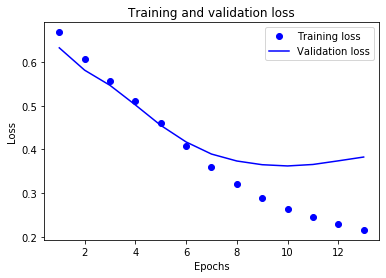

In [512]:
import matplotlib.pyplot as plt

history_dict = history.history
history_dict.keys()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# “bo”代表 "蓝点"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b代表“蓝色实线”
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [454]:
print('Test...')
y_pred = model.predict(X_test)
y_pred=y_pred.argmax(axis=1)
y_true=y_test.argmax(axis=1)
print('sequences 20 epochs max_features{} classification_report: \n'.format(max_features))
print(classification_report(y_true, y_pred))
print('sequences 20 epochs confusion_matrix: \n')
confusion_matrix(y_true, y_pred)

Test...
sequences 20 epochs max_features10000 classification_report: 

              precision    recall  f1-score   support

           0       0.94      0.84      0.89       213
           1       0.69      0.78      0.73       451
           2       0.68      0.60      0.64       330

    accuracy                           0.73       994
   macro avg       0.77      0.74      0.75       994
weighted avg       0.74      0.73      0.73       994

sequences 20 epochs confusion_matrix: 



array([[179,  32,   2],
       [  8, 352,  91],
       [  4, 127, 199]])

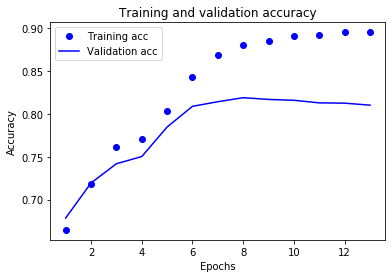

In [514]:
plt.clf()   # 清除数字

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [515]:
print('Test...')
y_pred = model.predict(X_test)
y_pred=y_pred.argmax(axis=1)
y_true=y_test.argmax(axis=1)
print('sequences 20 epochs max_features{} classification_report: \n'.format(max_features))
print(classification_report(y_true, y_pred))
print('sequences 20 epochs confusion_matrix: \n')
confusion_matrix(y_true, y_pred)

Test...
sequences 20 epochs max_features160356 classification_report: 

              precision    recall  f1-score   support

           0       0.92      0.85      0.88       213
           1       0.67      0.75      0.71       451
           2       0.65      0.57      0.61       330

    accuracy                           0.71       994
   macro avg       0.75      0.73      0.73       994
weighted avg       0.72      0.71      0.71       994

sequences 20 epochs confusion_matrix: 



array([[181,  30,   2],
       [ 12, 340,  99],
       [  4, 137, 189]])

#  3.调包侠-FastText

https://github.com/facebookresearch/fastText

In [80]:
from fasttext import train_supervised

In [81]:
dataset_df

,web-scraper-order,web-scraper-start-url,item,label
0,1566523436-2497,https://study.baidu.com/tiku,左传 记载 春秋 后期 鲁国 大夫 季孙氏 家臣 阳虎 独掌 权柄 后 标榜 鲁国 国君 整...,__label__古代史
1,1566523436-2506,https://study.baidu.com/tiku,秦始皇 统一 六国后 创制 一套 御玺 任命 国家 官员 封印 皇帝 之玺 任命 四夷 官员...,__label__古代史
2,1566523436-2153,https://study.baidu.com/tiku,北宋 加强 中央集权 主要 措施 主要 将领 兵权 收归 中央 派 文官 担任 地方 长官 ...,__label__古代史
3,1566523436-2328,https://study.baidu.com/tiku,商朝人 崇信 鬼神 占卜 祭祀 神灵 沟通 手段 负责 通神 事务 商王 巫师 往往 出身 ...,__label__古代史
4,1566523436-1914,https://study.baidu.com/tiku,公元 年 北宋 政府 江淮地区 设置 包括 盐业 管理 控制 茶叶 销售 专卖 主要职责 转...,__label__古代史
5,1566523436-2410,https://study.baidu.com/tiku,左传 有云昔 周公 大公 股肱 周室 夹辅成 王成 王劳 赐 之盟 曰 世世 子孙 无相害 ...,__label__古代史
6,1566523436-2243,https://study.baidu.com/tiku,某一 同学 研究性 学习 过程 中 搜集 如下 一组 图片 据此 判断 研究 主题 中国 古...,__label__古代史
7,1566523436-2545,https://study.baidu.com/tiku,古人 秦朝 短期 而亡 主要 原因 分析 最 准确 废先 王之道 燔 百家 之言以 愚 黔首...,__label__古代史
8,1566523436-2129,https://study.baidu.com/tiku,汉书 武帝纪 记载 春 正月 诏 曰 梁王 城阳 王亲 慈同 生愿 邑 分弟 其许 诸侯王 ...,__label__古代史
9,1566523436-1969,https://study.baidu.com/tiku,元代 行省 设置 无视 历来 划界 密切相关 几条 最 重要 山川 边界 秦岭 淮河 南岭 ...,__label__古代史


# 训练数据 测试数据划分

In [249]:
train_data, test_data=train_test_split(dataset_df[['label','item']],test_size=0.2,random_state=42)

# 保存数据

In [518]:
train_data_path='data/train_data.csv'
test_data_path='data/test_data.csv'

train_data.to_csv(train_data_path,index=None,header=None,sep=' ')
test_data.to_csv(test_data_path,index=None,header=None,sep=' ')

In [519]:
model = train_supervised(input=train_data_path, epoch=20, lr=1.0, wordNgrams=2, verbose=2, minCount=1)

In [520]:
print(model.words)

['答案', '知识点', '解析', '材料', '中国', '使用', '排除', '加入', '空间', '难度', '纠错', '题型', '复制', '次数', '选题', '收藏', '</s>', '篮', '查看', '单选题', '发展', '制度', '错误', '中', '经济', '不', '正确', '年', '主要', '项', '故项', '本题', '政治', '符合', '可知', '知识', '出现', '所学', '考查', '国家', '资本主义', '题意', '政策', '思想', '新', '反映', '时期', '没有', '体现', '世界', '民族', '社会', '英国', '美国', '信息', '结合', '皇帝', '上', '说明', '能力', '选项', '中央', '制', '形成', '都', '影响', '世纪', '后', '人', '不是', '历史', '工业', '变化', '关系', '近代', '郡县制', '农抑商', '重', '建立', '革命', '学生', '属于', '政府', '权力', '官制', '三公九卿', '民主', '主张', '当时', '夏商', '两代', '确立', '制度"', '西方', '实行', '使', '成为', '加强', '社会主义', '提出', '产生', '年代', '问题', '原因', '地位', '法国', '文化', '世界市场', '认为', '不能', '说', '发展"', '选', '地方', '资产阶级', '史实', '走向', '兴起', '议会', '进行', '这一', '改革', '建设', '传统', '内阁', '出', '时间', '说法', '人民', '故选', '强调', '统治', '工业革命', '解读', '不符', '分析', '观点', '农业', '推动', '欧洲', '人类', '指', '民主革命', '现象', '春秋战国', '促进', '运动', '表明', '君主专制', '要求', '体系', '古代', '"年', '科学', '生产', '题干', '清末', '国王', '涉及', '分封制', '内容', '孔子', '时', '选官', '春天', 

In [521]:
len(model.words)

29360

In [522]:
print(model.labels)

['__label__现代史', '__label__近代史', '__label__古代史']


# 评估

In [523]:
def print_results(N, p, r):
    print("N\t" + str(N))
    print("P@{}\t{:.3f}".format(1, p))
    print("R@{}\t{:.3f}".format(1, r))

In [524]:
print_results(*model.test(test_data_path))

N	994
P@1	0.698
R@1	0.698


# 保存模型

In [260]:
model.save_model("data/model/his.bin")

# 量化

In [261]:
model.quantize(input=train_data_path, qnorm=True, retrain=True, cutoff=100000)
print_results(*model.test(test_data_path))
model.save_model("data/model/his.ftz")

N	994
P@1	0.699
R@1	0.699
